In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


In [34]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [35]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
print(train_data.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [38]:
train_data.drop(['Id'],axis=1,inplace=True)
test_data.drop(['Id'],axis=1,inplace=True)

In [39]:
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [40]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.fit_transform(test_data[col])

test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,8,4
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,8,4
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,8,4
4,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,8,4


In [41]:
null_columns = train_data.columns[train_data.isnull().any()]
null_columns_list = null_columns.tolist()
train_data[null_columns] = train_data[null_columns].fillna(value=train_data[null_columns].mean())

In [42]:
print(train_data.isnull().sum().to_string())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [43]:
train_data.head(1000)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.000000,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.000000,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.000000,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.000000,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.000000,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,3,51.000000,4712,1,2,0,3,0,4,...,0,3,2,4,0,8,2006,8,0,121600
996,20,3,70.049958,10659,1,2,0,3,0,4,...,0,3,4,4,0,1,2006,0,4,136500
997,20,3,70.049958,11717,1,2,0,3,0,4,...,0,3,4,4,0,2,2009,8,4,185000
998,30,4,60.000000,9786,1,2,3,3,0,4,...,0,3,4,4,0,5,2006,8,4,91000


In [44]:
all_columns_list = train_data.columns.tolist()
all_columns_list.pop()
all_columns_list

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [45]:
scaler = MinMaxScaler()
train_data[all_columns_list] = scaler.fit_transform(train_data[all_columns_list])

In [46]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,0.8,208500
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,0.8,181500
2,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,0.8,223500
3,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.0,140000
4,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,0.8,250000


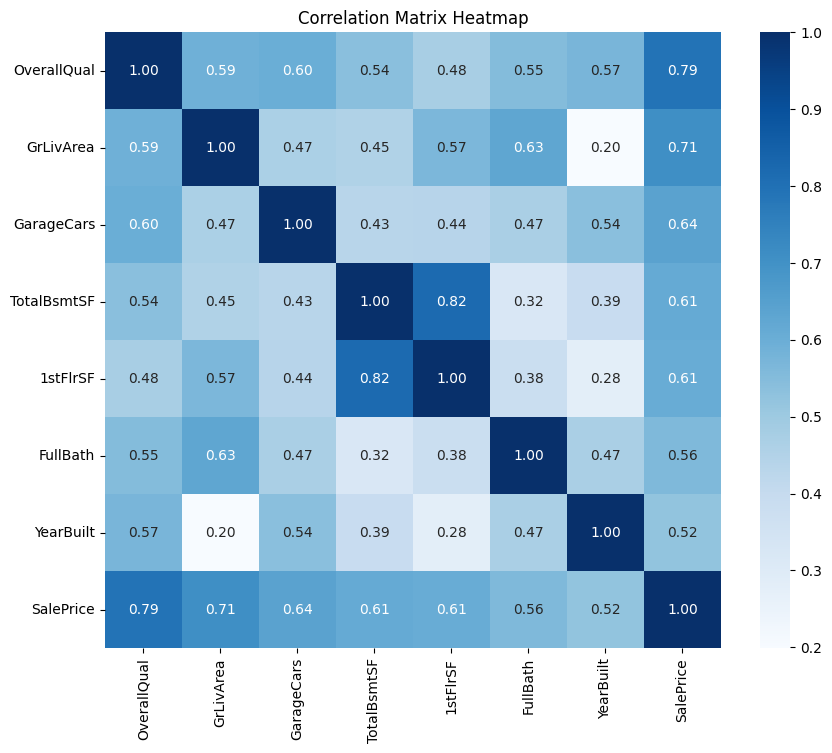

In [47]:
# List of important features to consider
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'SalePrice']

# Subset the data to include only the important features
subset_data = train_data[important_features]

# Convert categorical columns to numerical columns using label encoding (if any)
label_encoders = {}
for column in subset_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    subset_data[column] = label_encoders[column].fit_transform(subset_data[column].astype(str))

# Compute the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', square=True, cbar=True,
            annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,0.8,208500
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,0.8,181500
2,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,0.8,223500
3,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.0,140000
4,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,0.8,250000


In [49]:
x = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

In [50]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,0.8


In [51]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [52]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [53]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,0.000000,0.75,0.167808,0.033186,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.454545,1.00,1.0,0.8
1066,0.235294,0.75,0.130137,0.030555,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.75,1.0,0.8
638,0.058824,0.75,0.157534,0.034948,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.5,1.0,0.0,0.363636,0.50,1.0,0.8
799,0.176471,0.75,0.133562,0.027577,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.5,1.0,0.0,0.454545,0.25,1.0,0.8
380,0.176471,0.75,0.099315,0.017294,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,1.00,1.0,0.8


In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
acc_r2_score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [58]:
print(acc_r2_score)
print(mae)
print(mse)

0.842957615210129
22001.52236624703
1204566319.6929119


In [59]:
# train_data.head()
model.score(X_test,y_test)

0.842957615210129

AttributeError: module 'matplotlib.pyplot' has no attribute 's'

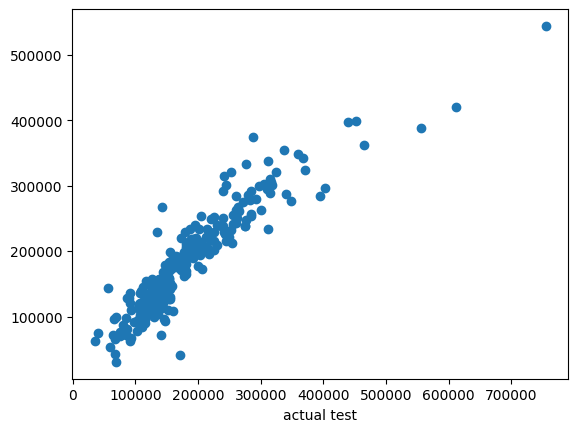

In [ ]:
lasso=Lasso()
lasso.fit(X_train,  y_train)
lass_y_predict = lasso.predict(X_test)





In [ ]:

lass_r2_score=r2_score(y_test,lass_y_predict)
lass_mae=mean_absolute_error(y_test,lass_y_predict)
lass_mse=mean_squared_error(y_test,lass_y_predict)

print(lass_r2_score)
print(lass_mae)
print(lass_mse)
print(lasso.score(X_test,y_test))

0.8447225313196702
21522.374506244374
1191028837.4044118
0.8447225313196702


In [ ]:
ridge=  Ridge()
ridge.fit(X_train,  y_train)
ridge_y_predict = lasso.predict(X_test)

In [ ]:

ridge_r2_score=r2_score(y_test,ridge_y_predict)
ridge_mae=mean_absolute_error(y_test,ridge_y_predict)
ridge_mse=mean_squared_error(y_test,ridge_y_predict)

print(ridge_r2_score)
print(ridge_mae)
print(ridge_mse)
print(ridge.score(X_test,y_test))

0.8447225313196702
21522.374506244374
1191028837.4044118
0.8482701794321762
